# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
temp=[]
lat=[]
long=[]
humidity=[]
windspeed=[]
cloud=[]
country=[]
date=[]
cityfound=[]
for city in cities:
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    try:
        weather=requests.get(url).json()
        temp.append(weather["main"]["temp"])
        lat.append(weather["coord"]["lat"])
        long.append(weather["coord"]["lon"])
        humidity.append(weather["main"]["humidity"])
        windspeed.append(weather["wind"]["speed"])
        cloud.append(weather["clouds"]["all"])
        country.append(weather["sys"]["country"])
        date.append(weather["dt"])
        cityfound.append(city)
        print("found " + city)
    except:
        print("couldn't find " + city)
temp

city_df=pd.DataFrame({"Temperature":temp,
                      "Latitude":lat,
                      "Longitude":long,
                      "Humidity":humidity,
                      "Wind Speed":windspeed,
                      "Cloud":cloud,
                      "Country":country,
                      "Date":date,
                      "City":cityfound
                      })
city_df


found new norfolk
found bluff
found yellowknife
found hasaki
found sampit
found puerto ayora
found mahon
found albany
found lebu
found kapaa
found cape town
found port hardy
found lithakia
found puerto carreno
found busselton
found narsaq
couldn't find mys shmidta
found cherskiy
found innisfail
found rikitea
found areosa
couldn't find taolanaro
found ushuaia
found castro
found tasiilaq
found touros
found kavieng
found akkermanovka
found hermanus
found san rafael del sur
found port augusta
found souillac
found manono
found mataura
found zeya
found payo
found cap malheureux
found cayenne
found san angelo
found khromtau
found tubuala
found hithadhoo
couldn't find ngukurr
found luderitz
found lumsden
found khandyga
found vaini
found avarua
found manokwari
found east london
found tlaxco
found salalah
found punta arenas
found bereda
found umm lajj
found bengkulu
found saint-ambroise
couldn't find katha
found lorengau
found jaguarari
found mar del plata
found mahebourg
found dikson
found chuy

found birao
found lasa
found carballo
found abu kamal
found mizdah
found ensley
found ballina
found wana
found panaba
found mombetsu
found kenai
found the valley
found basoko
found shache
found kadiri
found kouango
found dryden
found karratha
found sebrovo
found gwadar
found raga
found alice springs
found kilindoni
found kyren
found nome
found vigrestad
couldn't find marv dasht
found flinders
found storforshei
found rundu
found davila
found shihezi
found pisco
found okha
couldn't find richard toll
found mwene-ditu
found tabou
found azad shahr
found aklavik
found mocuba
found laguna
found korhogo
found sabha
found bonthe
found kaseda
found san jeronimo
found sitka
found okhotsk
found san javier
found rodrigues alves
found ilhabela
found san julian
found evensk
found nanortalik
couldn't find geresk
found kaduqli
found harrison
found san matias
found quatre cocos
found port victoria
found santa fe
found lyubinskiy
found nchelenge
found north branch
found lashio
found archidona
found banja

,Temperature,Latitude,Longitude,Humidity,Wind Speed,Cloud,Country,Date,City
0,52.65,-42.7826,147.0587,70,5.01,94,AU,1627433520,new norfolk
1,51.80,-46.6000,168.3333,70,11.18,44,NZ,1627433142,bluff
2,61.54,62.4560,-114.3525,48,1.99,40,CA,1627433623,yellowknife
3,83.26,35.7333,140.8333,80,20.27,100,JP,1627433212,hasaki
4,82.13,-2.5333,112.9500,74,4.59,77,ID,1627433625,sampit
...,...,...,...,...,...,...,...,...,...
532,60.76,-34.2000,142.1500,63,13.80,0,AU,1627433795,mildura
533,75.65,9.3328,-69.1208,92,1.88,100,VE,1627433795,villa bruzual
534,51.42,65.6118,72.6842,77,11.59,100,RU,1627433795,staryy nadym
535,59.86,-16.6228,-72.7111,89,8.46,72,PE,1627433796,camana


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df.to_csv("city.csv")

In [5]:
city_df

,Temperature,Latitude,Longitude,Humidity,Wind Speed,Cloud,Country,Date,City
0,52.65,-42.7826,147.0587,70,5.01,94,AU,1627433520,new norfolk
1,51.80,-46.6000,168.3333,70,11.18,44,NZ,1627433142,bluff
2,61.54,62.4560,-114.3525,48,1.99,40,CA,1627433623,yellowknife
3,83.26,35.7333,140.8333,80,20.27,100,JP,1627433212,hasaki
4,82.13,-2.5333,112.9500,74,4.59,77,ID,1627433625,sampit
...,...,...,...,...,...,...,...,...,...
532,60.76,-34.2000,142.1500,63,13.80,0,AU,1627433795,mildura
533,75.65,9.3328,-69.1208,92,1.88,100,VE,1627433795,villa bruzual
534,51.42,65.6118,72.6842,77,11.59,100,RU,1627433795,staryy nadym
535,59.86,-16.6228,-72.7111,89,8.46,72,PE,1627433796,camana


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_df=city_df.loc[city_df["Humidity"]>100]
len(humidity_df)

0

Based on the result above, No cities have humidity over 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

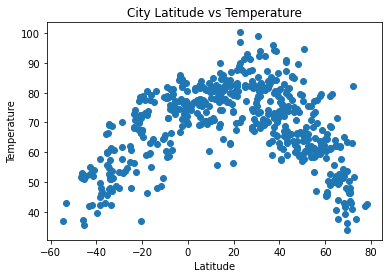

In [9]:
x_values = city_df['Latitude']
y_values = city_df['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs Temperature')
plt.show()

## Latitude vs. Humidity Plot

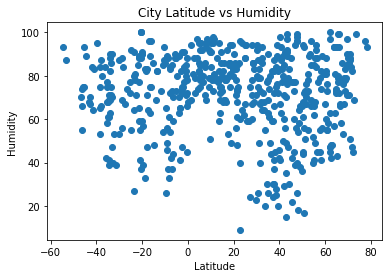

In [10]:
x_values = city_df['Latitude']
y_values = city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

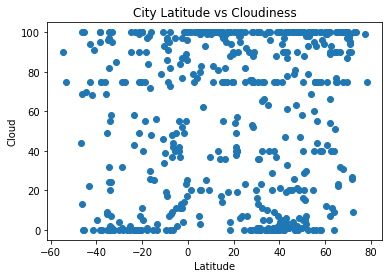

In [11]:
x_values = city_df['Latitude']
y_values = city_df['Cloud']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloud')
plt.title('City Latitude vs Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

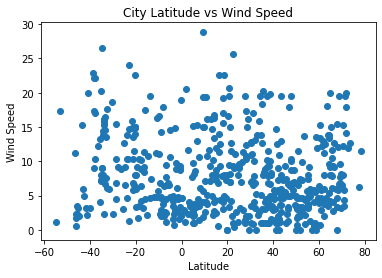

In [12]:
x_values = city_df['Latitude']
y_values = city_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [45]:
Northern_df=city_df.loc[city_df["Latitude"]>=0]
Northern_df
x_values = Northern_df['Latitude']
y_values = Northern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)


2      60.653915
3      71.731341
6      70.008876
7      68.884830
9      77.393067
         ...    
530    69.461403
531    63.252453
533    82.675205
534    59.345733
536    63.685349
Name: Latitude, Length: 373, dtype: float64
y = -0.41x +86.54


The r-value is: 0.4205799484451455


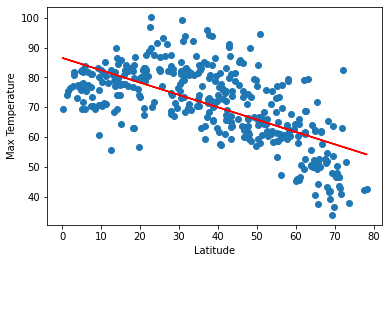

In [46]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = -0.41x +86.54",(-5,5),fontsize=15,color="red")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
Southern_df=city_df.loc[city_df["Latitude"]<0]
Southern_df
x_values = Southern_df['Latitude']
y_values = Southern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      49.187876
1      46.584264
4      76.639430
5      77.863006
8      52.711216
         ...    
522    72.781345
524    78.057864
528    51.212438
532    55.041536
535    67.029855
Name: Latitude, Length: 164, dtype: float64
y = 0.68x +78.37


The r-value is: 0.582540777477247


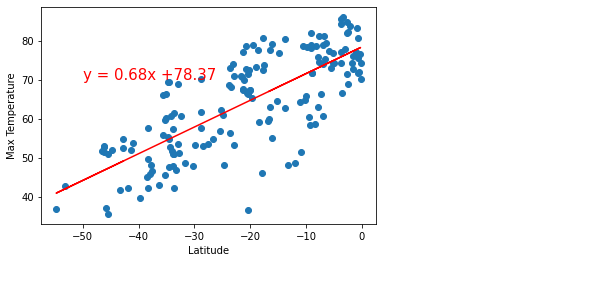

In [48]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = 0.68x +78.37",(-50,70),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [49]:
x_values = Northern_df['Latitude']
y_values = Northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

2      68.599912
3      72.261495
6      71.692143
7      71.320596
9      74.132947
         ...    
530    71.511179
531    69.458844
533    75.878929
534    68.167499
536    69.601936
Name: Latitude, Length: 373, dtype: float64
y = -0.14x +77.16


The r-value is: 0.020469925235559343


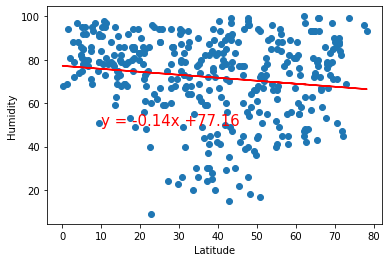

In [50]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = -0.14x +77.16",(10,50),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [51]:
x_values = Southern_df['Latitude']
y_values = Southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      71.972628
1      72.112328
4      70.499677
5      70.434025
8      71.783578
         ...    
522    70.706688
524    70.423569
528    71.863997
532    71.658542
535    71.015292
Name: Latitude, Length: 164, dtype: float64
y = -0.04x +70.41


The r-value is: 0.0009191020193893798


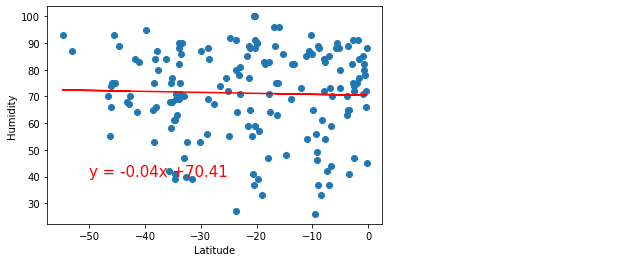

In [52]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = -0.04x +70.41",(-50,40),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [53]:
x_values = Northern_df['Latitude']
y_values = Northern_df['Cloud']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

2      58.704257
3      61.420945
6      60.998518
7      60.722851
9      62.809458
         ...    
530    60.864253
531    59.341536
533    64.104878
534    58.383431
536    59.447702
Name: Latitude, Length: 373, dtype: float64
y = -0.1x +65.05


The r-value is: 0.002670608228420137


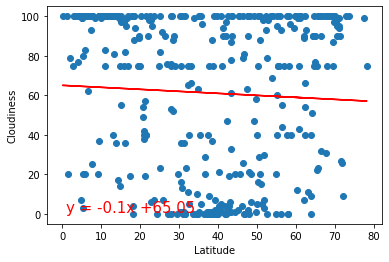

In [54]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = -0.1x +65.05",(1,1),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [55]:
x_values = Southern_df['Latitude']
y_values = Southern_df['Cloud']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      46.216809
1      45.897352
4      49.585049
5      49.735179
8      46.649114
         ...    
522    49.111671
524    49.759088
528    46.465218
532    46.935039
535    48.405977
Name: Latitude, Length: 164, dtype: float64
y = 0.08x +49.8


The r-value is: 0.0009482527366829293


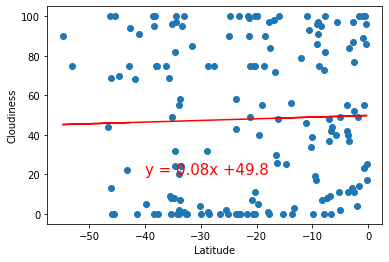

In [57]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = 0.08x +49.8",(-40,20),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [58]:
x_values = Northern_df['Latitude']
y_values = Northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

2      7.283167
3      7.530646
6      7.492165
7      7.467053
9      7.657134
         ...   
530    7.479934
531    7.341221
533    7.775141
534    7.253941
536    7.350892
Name: Latitude, Length: 373, dtype: float64
y = -0.01x +7.86


The r-value is: 0.0011654395839416332


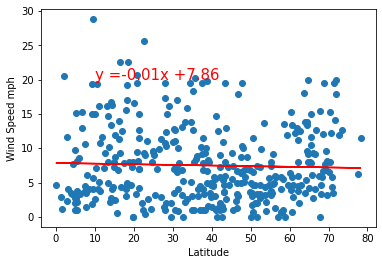

In [60]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y =-0.01x +7.86",(10,20),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [61]:
x_values = Southern_df['Latitude']
y_values = Southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      10.965899
1      11.343858
4       6.980831
5       6.803208
8      10.454425
         ...    
522     7.540899
524     6.774921
528    10.671998
532    10.116139
535     8.375827
Name: Latitude, Length: 164, dtype: float64
y = -0.1x +6.73


The r-value is: 0.05705552019415576


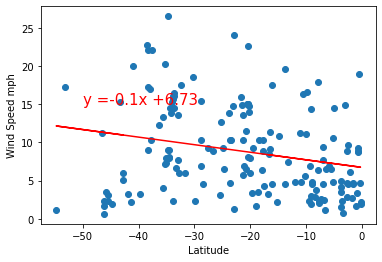

In [62]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y =-0.1x +6.73",(-50,15),fontsize=15,color="red")

plt.show()